In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),    
)
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

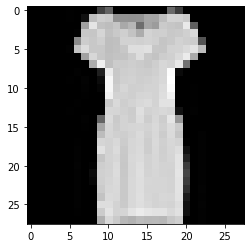

In [10]:
import matplotlib.pyplot as plt
img, label = training_data[20]
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [11]:
# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=16, shuffle=True)
train_dataloader

In [16]:
for X, y in train_dataloader:
    print(X.shape, y.shape)
    break

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [18]:
# Get cpu, gpu or mps device for training.
device = "cpu"
print(f"Using {device} device")

Using cpu device


In [19]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [21]:
X = torch.rand(1, 28, 28, device=device)
X.shape

torch.Size([1, 28, 28])

In [22]:
logits = model(X)
logits

tensor([[ 0.1007,  0.0930,  0.0980, -0.0356,  0.0684,  0.1596, -0.0112, -0.0003,
         -0.0650,  0.0831]], grad_fn=<AddmmBackward0>)

In [25]:
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
y_pred

tensor([5])

In [24]:
m = nn.Softmax(dim=1)
input = torch.randn(2, 3)
output = m(input)
output

tensor([[0.2271, 0.3570, 0.4159],
        [0.7835, 0.0790, 0.1375]])

In [30]:
input_image = torch.rand(3,28,28)
flat_image = nn.flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [32]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: torch.Size([3, 20])


After ReLU: torch.Size([3, 20])


In [37]:
for name, param in model.named_parameters():
    print(name, param.size())

linear_relu_stack.0.weight torch.Size([512, 784])
linear_relu_stack.0.bias torch.Size([512])
linear_relu_stack.2.weight torch.Size([512, 512])
linear_relu_stack.2.bias torch.Size([512])
linear_relu_stack.4.weight torch.Size([10, 512])
linear_relu_stack.4.bias torch.Size([10])


In [49]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [53]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [54]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    # test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.316730  [   64/60000]
loss: 0.713885  [ 6464/60000]
loss: 0.684405  [12864/60000]
loss: 0.605038  [19264/60000]
loss: 0.335216  [25664/60000]
loss: 0.898623  [32064/60000]
loss: 0.438209  [38464/60000]
loss: 0.527769  [44864/60000]
loss: 0.561044  [51264/60000]
loss: 0.420071  [57664/60000]
Epoch 2
-------------------------------
loss: 0.243514  [   64/60000]
loss: 0.493732  [ 6464/60000]
loss: 0.422470  [12864/60000]
loss: 0.354439  [19264/60000]
loss: 0.661706  [25664/60000]
loss: 0.466509  [32064/60000]
loss: 0.304925  [38464/60000]
loss: 0.529063  [44864/60000]
loss: 0.405223  [51264/60000]
loss: 0.428922  [57664/60000]
Epoch 3
-------------------------------
loss: 0.316796  [   64/60000]
loss: 0.356942  [ 6464/60000]
loss: 0.317467  [12864/60000]
loss: 0.278994  [19264/60000]
loss: 0.237434  [25664/60000]
loss: 0.515668  [32064/60000]
loss: 0.580090  [38464/60000]
loss: 0.258641  [44864/60000]
loss: 0.321607  [51264/60000]
loss: 0.34